In [1]:
import numpy as np
import pandas as pd
import os 
import tensorflow as tf
import tensorflow.keras as keras
from keras import Model
from keras.applications.densenet import DenseNet121
from keras.applications import vgg16
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pathlib
from sklearn.metrics.pairwise import linear_kernel

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install opencv-python


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 991.0 kB/s eta 0:00:39
   ---------------------------------------- 0.1/38.6 MB 544.7 kB/s eta 0:01:11
   ---------------------------------------- 0.1/38.6 MB 944.1 kB/s eta 0:00:41
   ---------------------------------------- 0.2/38.6 MB 980.4 kB/s eta 0:00:40
   ---------------------------------------- 0.3/38.6 MB 1.1 MB/s eta 0:00:34
   ---------------------------------------- 0.3/38.6 MB 983.9 kB/s eta 0:00:39
   ---------------------------------------- 0.4/38.6 MB 1.1 MB/s eta 0:00:34
    --------------------------------------- 0.6/38.6 MB 1.4 MB/s eta 0:00:27
    --------------------------------------- 0.7/38.6 MB 1.5 MB/s eta 0:00:26
    --------------------------------------- 0.8/38.6 MB 1.7 MB/s eta 0:00:23
   - -------------------------------------- 1.1/38.6 MB 1.9 MB/s eta 0:00:20
   - -------------------------------------- 1.2/38.6 MB 2.0 MB/s eta 0:0

In [4]:
path = 'images/'
dataset_path = pathlib.Path(path)
dirs_names = os.listdir(dataset_path) # list content of dataset
dirs_names

['10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '10020.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '10030.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10035.jpg',
 '10037.jpg',
 '10039.jpg',
 '10040.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '10060.jpg',
 '10061.jpg',
 '10062.jpg',
 '10063.jpg',
 '10064.jpg',
 '10065.jpg',
 '10066.jpg',
 '10067.jpg',
 '10068.jpg',
 '10069.jpg',
 '10070.jpg',
 '10071.jpg',
 '10072.jpg',
 '10073.jpg',
 '1007

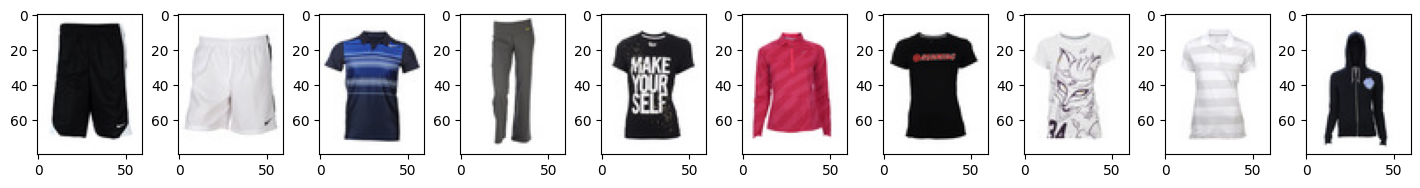

In [5]:
# Plot samples 
plt.figure(figsize=(20,20))
for i in range(20,30):
    plt.subplot(6, 10, i-10+1)
    cloth_img = mpimg.imread(path + '100' + str(i) + '.jpg')
 # Assign images ids
    plt.imshow(cloth_img)
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

In [9]:
import pandas as pd

# Define the path variable appropriately if not already defined

# Read 6000 rows from the CSV file and skip bad lines
styles_df = pd.read_csv("styles.csv", nrows=6000, on_bad_lines='skip')

# Create an 'image' column that contains the filename based on the 'id' column
styles_df['image'] = styles_df['id'].astype(str) + ".jpg"

# Print the shape of the DataFrame and display the first 5 rows
print(styles_df.shape)
print(styles_df.head(5))


(6000, 11)
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

   year   usage                             productDisplayName      image  
0  2011  Casual               Turtle Check Men Navy Blue Shirt  15970.jpg  
1  2012  Casual             Peter England Men Party Blue Jeans  39386.jpg  
2  2016  Casual                       Titan Women Silver Watch  59263.jpg  
3  2011  Casual  Manchester United Men Solid Black Track Pants  21379.jpg  
4  2012  Casual                          Puma Men Grey T-shirt  53759.jpg  


<Axes: ylabel='articleType'>

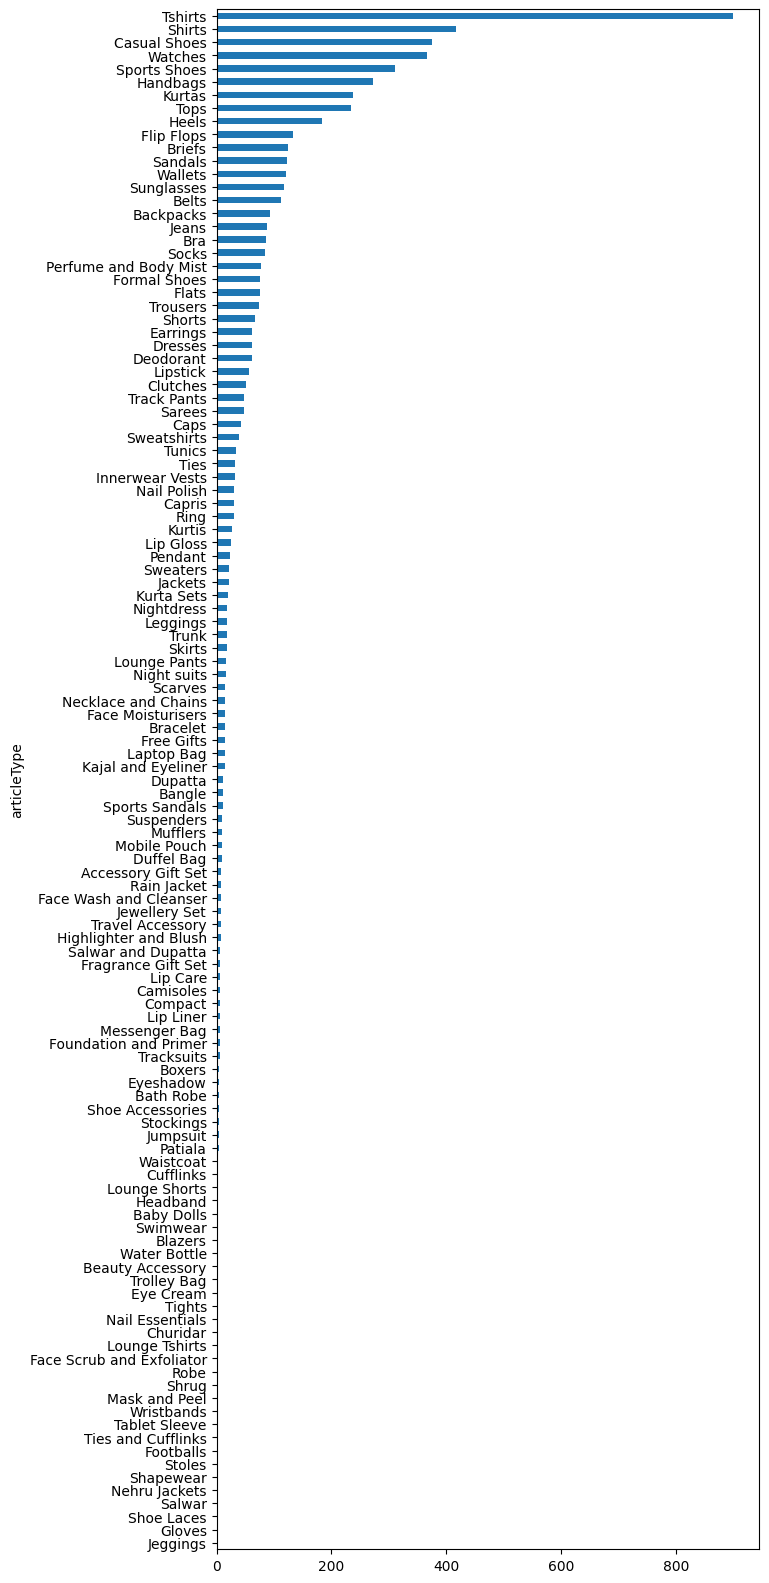

In [10]:
plt.figure(figsize=(7,20))
styles_df.articleType.value_counts().sort_values().plot(kind='barh')

In [11]:
img_width, img_height, chnls = 100, 100, 3

In [12]:
#VGG16
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(img_width, img_height, chnls))
vgg16.trainable=False
vgg16_model = keras.Sequential([vgg16, GlobalMaxPooling2D()])
vgg16_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [77]:
def img_path(img):
    """ Take image name(id) and return the complete path of it """
    return 'images/' + img

def predict(model, img_name):
    """ Load and preprocess image then make prediction """
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    img = image.img_to_array(img)
    # Expand Dim (1, w, h)
    img = np.expand_dims(img, axis=0)
    # Pre process Input
    img = preprocess_input(img)
    return model.predict(img)

In [14]:
def get_embeddings(df, model):
    """ Return a dataframe contains images features """
    df_copy = df
    df_embeddings = df_copy['image'].apply(lambda x: predict(vgg16_model, x).reshape(-1))
    df_embeddings = df_embeddings.apply(pd.Series)
    return df_embeddings

df_embeddings = get_embeddings(styles_df, vgg16_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/s

In [15]:
df_embeddings.head(5)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.000000,0.0,0.000000,0.000000,0.416762,0.000000,0.000000,0.0,0.0,0.0,...,0.465505,2.526568,0.000000,0.000000,0.023388,0.256389,0.000000,0.000000,0.663360,2.707127
1,0.656389,0.0,0.226173,0.000000,0.734096,0.000000,1.910263,0.0,0.0,0.0,...,1.004094,3.999026,0.000000,0.623048,0.519439,0.552858,1.366484,0.992331,0.629039,1.477583
2,0.113616,0.0,0.000000,1.226545,0.866502,0.000000,0.938750,0.0,0.0,0.0,...,1.014141,0.170607,0.000000,0.115413,0.141611,0.493683,0.078028,0.000000,1.143075,0.000000
3,0.000000,0.0,0.000000,0.000000,0.614342,0.000000,0.848841,0.0,0.0,0.0,...,1.126509,2.467212,0.124418,0.000000,0.000000,0.192454,0.507867,0.000000,0.111598,2.579833
4,0.000000,0.0,0.000000,0.000000,0.096240,0.220482,0.000000,0.0,0.0,0.0,...,0.163552,0.334457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044779,2.458951


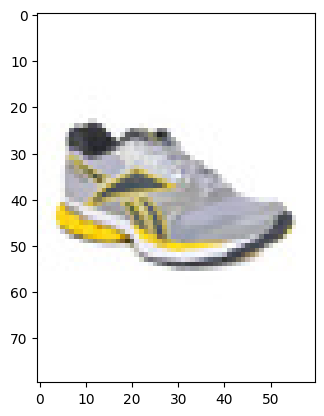

In [86]:
url="images/10037.jpg"
a = plt.imread(url)
plt.imshow(a)

In [87]:
sample_image = predict(vgg16_model, '10037.jpg')
sample_image.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


(1, 512)

In [88]:
df_sample_image = pd.DataFrame(sample_image)  
print(df_sample_image)

        0    1         2         3         4         5         6         7    \
0  1.232842  0.0  1.537537  1.712547  0.514035  0.017466  0.033559  0.361007   

        8        9    ...       502       503       504      505       506  \
0  0.394321  2.84806  ...  2.008373  0.738438  0.862057  0.46751  2.182925   

        507       508       509       510  511  
0  0.959994  1.324327  1.141768  2.291011  0.0  

[1 rows x 512 columns]


In [89]:
sample_similarity = linear_kernel(df_sample_image, df_embeddings)
print(sample_similarity)

[[345.0602  431.02133 337.35934 ... 541.1433  405.47818 451.31845]]


In [90]:
def get_similarity(model):
    """ Get similarity of custom image """
    sample_image = predict(vgg16_model, '10037.jpg')
    df_sample_image = pd.DataFrame(sample_image)
    sample_similarity = linear_kernel(df_sample_image, df_embeddings)
    return sample_similarity

In [91]:
def normalize_sim(similarity):
    """ Normalize similarity results """
    x_min = similarity.min(axis=1)
    x_max = similarity.max(axis=1)
    norm = (similarity-x_min)/(x_max-x_min)[:, np.newaxis]
    return norm

sample_similarity_norm = normalize_sim(sample_similarity)
sample_similarity_norm.shape

(1, 6000)

In [92]:
def get_recommendations(df, similarity):
    """ Return the top 5 most similar products """
    # Get the pairwsie similarity scores of all clothes with that one (index, value)
    sim_scores = list(enumerate(similarity[0]))
    
    # Sort the clothes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 5 most similar clothes
    sim_scores = sim_scores[0:5]
    print(sim_scores)
    # Get the clothes indices
    cloth_indices = [i[0] for i in sim_scores]

    # Return the top 5 most similar products
    return df['image'].iloc[cloth_indices]

[(916, 1.0), (5783, 0.9614006), (792, 0.9373466), (855, 0.921582), (53, 0.911168)]


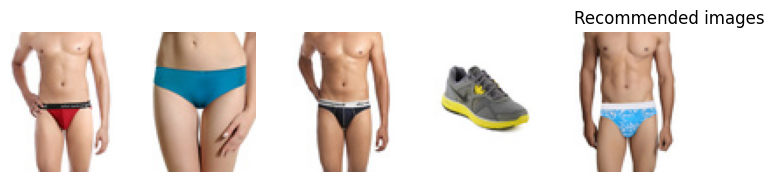

In [94]:
recommendation = get_recommendations(styles_df, sample_similarity_norm)
recommendation_list = recommendation.to_list()
#recommended images
plt.figure(figsize=(20,20))
j=0
for i in recommendation_list:
    plt.subplot(6, 10, j+1)
    cloth_img =  mpimg.imread('images/'+ i)
    plt.imshow(cloth_img)
    plt.axis("off")
    j+=1
plt.title("Recommended images",loc='left')
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

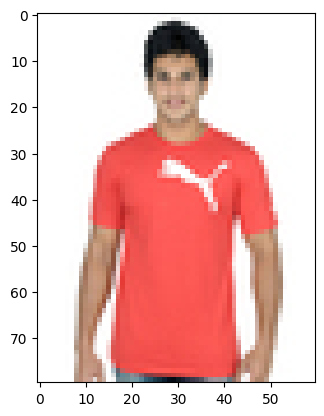

In [78]:
url="images/1533.jpg"
a = plt.imread(url)
plt.imshow(a)

In [79]:
sample_image = predict(vgg16_model, '1533.jpg')
sample_image.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


(1, 512)

In [80]:
df_sample_image = pd.DataFrame(sample_image)  
print(df_sample_image)

        0         1        2    3         4    5        6         7    \
0  1.864407  1.414989  1.65938  0.0  1.559425  0.0  3.31452  0.616322   

        8    9    ...       502       503       504       505       506  \
0  1.477503  0.0  ...  1.769154  3.055456  0.465772  1.026726  0.951201   

        507       508       509       510      511  
0  0.727254  2.406587  0.148321  0.754696  0.57081  

[1 rows x 512 columns]


In [81]:
sample_similarity = linear_kernel(df_sample_image, df_embeddings)
print(sample_similarity)

[[514.5229  654.8382  435.03033 ... 548.0372  603.4615  525.37286]]


In [82]:
def normalize_sim(similarity):
    """ Normalize similarity results """
    x_min = similarity.min(axis=1)
    x_max = similarity.max(axis=1)
    norm = (similarity-x_min)/(x_max-x_min)[:, np.newaxis]
    return norm

sample_similarity_norm = normalize_sim(sample_similarity)
sample_similarity_norm.shape

(1, 6000)

In [83]:
def get_recommendations(df, similarity):
    """ Return the top 5 most similar products """
    # Get the pairwsie similarity scores of all clothes with that one (index, value)
    sim_scores = list(enumerate(similarity[0]))
    
    # Sort the clothes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 5 most similar clothes
    sim_scores = sim_scores[0:5]
    print(sim_scores)
    # Get the clothes indices
    cloth_indices = [i[0] for i in sim_scores]

    # Return the top 5 most similar products
    return df['image'].iloc[cloth_indices]

[(53, 1.0), (4779, 0.9705141), (792, 0.9401336), (916, 0.9340268), (2118, 0.93104047)]


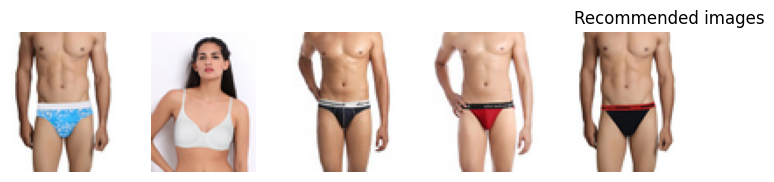

In [85]:
recommendation = get_recommendations(styles_df, sample_similarity_norm)
recommendation_list = recommendation.to_list()
#recommended images
plt.figure(figsize=(20,20))
j=0
for i in recommendation_list:
    plt.subplot(6, 10, j+1)
    cloth_img =  mpimg.imread('images/'+ i)
    plt.imshow(cloth_img)
    plt.axis("off")
    j+=1
plt.title("Recommended images",loc='left')
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

In [66]:
import numpy as np
import pandas as pd
import os 
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pathlib
from sklearn.metrics.pairwise import linear_kernel

class fashion_recommendations:
    """ Production class for recommendations of fashion from similarity """
    
    def __init__(self, img_path, df_embeddings, styles_path):
        self.img_path = img_path
        self.df_embeddings = df_embeddings
        self.styles_path = styles_path
    
    # Helper functions 
    def get_styles_df(self):
        """ Load a dataframe contains styles details and images """
        styles_df = pd.read_csv(self.styles_path, nrows=6000, error_bad_lines=False)  # Read 6000 product and drop bad lines
        styles_df['image'] = styles_df.apply(lambda x: str(x['id']) + ".jpg", axis=1)  # Make image column contains (id.jpg)
        return styles_df
    
    def load_model(self):
        """ Load our model """
        vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(100, 100, 3))
        vgg16.trainable = False
        vgg16_model = tf.keras.Sequential([vgg16, GlobalMaxPooling2D()])
        return vgg16_model

    def predict(self, model, img_path):
        """ Load and preprocess image then make prediction """
        # Reshape
        img = image.load_img(self.img_path, target_size=(100, 100))
        # img to Array
        img = image.img_to_array(img)
        # Expand Dim (1, w, h)
        img = np.expand_dims(img, axis=0)
        # Pre process Input
        img = preprocess_input(img)
        return model.predict(img)
    
    def get_similarity(self):
        """ Get similarity of custom image """
        model = self.load_model()
        df_embeddings = self.df_embeddings
        sample_image = self.predict(model, self.img_path)
        df_sample_image = pd.DataFrame(sample_image)
        sample_similarity = linear_kernel(df_sample_image, df_embeddings)
        return sample_similarity
    
    def normalize_sim(self):
        """ Normalize similarity results """
        similarity = self.get_similarity()
        x_min = similarity.min(axis=1)
        x_max = similarity.max(axis=1)
        norm = (similarity - x_min) / (x_max - x_min)[:, np.newaxis]
        return norm
    
    def get_recommendations(self):
        """ Get recommended images """
        similarity = self.normalize_sim()
        df = self.get_styles_df()
        # Get the pairwsie similarity scores of all clothes with that one (index, value)
        sim_scores = list(enumerate(similarity[0]))

        # Sort the clothes based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the scores of the 5 most similar clothes
        sim_scores = sim_scores[0:5]
        print(sim_scores)
        # Get the clothes indices
        cloth_indices = [i[0] for i in sim_scores]

        # Return the top 5 most similar products
        return df['image'].iloc[cloth_indices]
    
    def print_recommendations(self):
        """ Print the top 5 most similar products"""
        recommendation = self.get_recommendations()
        recommendation_list = recommendation.to_list()
        # Recommended images
        plt.figure(figsize=(20, 20))
        j = 0
        for i in recommendation_list:
            plt.subplot(6, 10, j + 1)
            cloth_img = mpimg.imread('images/' + i)
            plt.imshow(cloth_img)
            plt.axis("off")
            j += 1
        plt.title("Recommended images", loc='left')
        plt.subplots_adjust(wspace=-0.5, hspace=1)
        plt.show()
        return 


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Dell\AppData\Local\Temp\ipykernel_3512\2073799521.py:1: SyntaxWarning: invalid escape sequence '\s'
  url = "images\shirt_image.jpg"


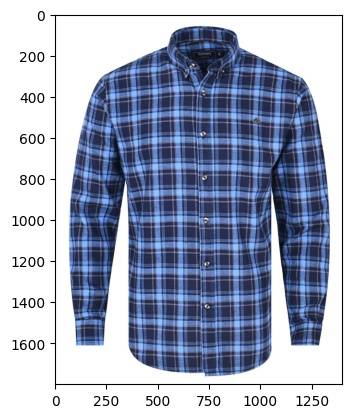

In [67]:
url = "images\shirt_image.jpg"
a = plt.imread(url)
plt.imshow(a)

In [69]:
def get_styles_df(self):
    """ Load a dataframe containing styles details and images """
    try:
        styles_df = pd.read_csv(self.styles_path, nrows=6000)
    except pd.errors.ParserError as e:
        print("Error parsing CSV file:", e)
        return None
    
    # Drop rows with missing values if needed
    styles_df.dropna(inplace=True)
    
    # Add the 'image' column containing (id.jpg)
    styles_df['image'] = styles_df['id'].astype(str) + ".jpg"
    
    return styles_df


In [72]:
img_path = 'images\shirt_image.jpg'
styles_path = r'styles.csv'
obj = fashion_recommendations(img_path, df_embeddings, styles_path)
obj.print_recommendations()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Dell\AppData\Local\Temp\ipykernel_3512\2453292400.py:1: SyntaxWarning: invalid escape sequence '\s'
  img_path = 'images\shirt_image.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


C:\Users\Dell\AppData\Local\Temp\ipykernel_3512\2453292400.py:1: SyntaxWarning: invalid escape sequence '\s'
  img_path = 'images\shirt_image.jpg'


TypeError: read_csv() got an unexpected keyword argument 'error_bad_lines'